In [ ]:
#

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import re
import os
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
enert= np.load('../fbp_features/fe_816.npy')
G= np.load('../fbp_features/fbp_816.npy')
g_st= preprocessing.MaxAbsScaler().fit_transform(G)
print '*********************'
print 'g_st ', g_st.shape
print 'enert ', enert.shape

*********************
g_st  (2400, 816)
enert  (2400,)


In [3]:
G_scaled= g_st
E=np.reshape(enert,(len(enert),1))
print E.shape
print G_scaled.shape

mixer= np.array(range(G_scaled.shape[0]))
for _ in range(10000):
    np.random.shuffle(mixer)
n= int(len(mixer)*0.75) # marking the 90%
G_train_scaled= G_scaled[mixer[:n]]
G_vali_scaled= G_scaled[mixer[n:]]
E_train= E[mixer[:n]]
E_vali= E[mixer[n:]]
trai_id= mixer[:n]
vali_id= mixer[n:]
print 'G_train_scaled->', G_train_scaled.shape
print 'G_vali_scaled->', G_vali_scaled.shape
print 'E_train->', E_train.shape
print 'E_vali->', E_vali.shape

(2400, 1)
(2400, 816)
G_train_scaled-> (1800, 816)
G_vali_scaled-> (600, 816)
E_train-> (1800, 1)
E_vali-> (600, 1)


In [4]:
#l= 100
#k= 70
#q= 40
#p= 1

In [5]:
l= 500
k= 256
q= 1
#p= 1
#t= 50
w0= tf.get_variable("w0", [G_scaled.shape[1], l], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b0= tf.Variable(tf.zeros([1,l]), name= 'b0')
w1= tf.get_variable("w1", [l, k], initializer = tf.contrib.layers.xavier_initializer(seed = 3))
b1= tf.Variable(tf.zeros([1,k]), name= 'b1')
w2= tf.get_variable("w2", [k, q], initializer = tf.contrib.layers.xavier_initializer(seed = 5))
b2= tf.Variable(tf.zeros([1,q]), name= 'b2')
#w3= tf.get_variable("w3", [q, p], initializer = tf.contrib.layers.xavier_initializer(seed = 7))
#b3= tf.Variable(tf.zeros([1,p]), name= 'b3')
#w4= tf.get_variable("w4", [p, t], initializer = tf.contrib.layers.xavier_initializer(seed = 7))
#b4= tf.Variable(tf.zeros([1,t]), name= 'b4')
#w5= tf.get_variable("w5", [t, 1], initializer = tf.contrib.layers.xavier_initializer(seed = 7))
#b5= tf.Variable(tf.zeros([1,1]), name= 'b5')

l= 40
k= 30
q= 1
#p= 1
#t= 50
w0= tf.Variable(tf.random_uniform([G_scaled.shape[1], l], -1.0, 1.0), name= 'w0')
b0= tf.Variable(tf.zeros([1,l]), name= 'b0')
w1= tf.Variable(tf.random_uniform([l, k], -1.0, 1.0), name= 'w1')
b1= tf.Variable(tf.zeros([1,k]), name= 'b1')
w2= tf.Variable(tf.random_uniform([k, q], -1.0, 1.0), name= 'w2')
b2= tf.Variable(tf.zeros([1,q]), name= 'b2')
#w3= tf.get_variable("w3", [q, p], initializer = tf.contrib.layers.xavier_initializer(seed = 7))
#b3= tf.Variable(tf.zeros([1,p]), name= 'b3')
#w4= tf.get_variable("w4", [p, t], initializer = tf.contrib.layers.xavier_initializer(seed = 7))
#b4= tf.Variable(tf.zeros([1,t]), name= 'b4')
#w5= tf.get_variable("w5", [t, 1], initializer = tf.contrib.layers.xavier_initializer(seed = 7))
#b5= tf.Variable(tf.zeros([1,1]), name= 'b5')

In [6]:
# input data, place holders
#x = tf.placeholder("float", [None, train_x.shape[1]], name= 'x')
x = tf.placeholder("float", [None, G_scaled.shape[1]], name= 'x')
y = tf.placeholder("float", [None, 1], name= 'y')
lear_rate= tf.placeholder(tf.float32, shape=[])
# model
z1= tf.nn.relu(tf.matmul(x,w0) + b0)
#z1= tf.nn.sigmoid(tf.matmul(x,w0) + b0)
z2= tf.nn.relu(tf.matmul(z1,w1) + b1)
#z2= tf.nn.sigmoid(tf.matmul(z1,w1) + b1)
#z3= tf.nn.relu(tf.matmul(z2,w2) + b2)
ynn= tf.matmul(z2,w2) + b2
#z5= tf.nn.relu(tf.matmul(z4,w4) + b4)
#ynn= tf.nn.relu(tf.matmul(z5,w5) + b5)
#regularizers = tf.nn.l2_loss(w0) + tf.nn.l2_loss(w1) + tf.nn.l2_loss(w2) #+ tf.nn.l2_loss(w3)
#loss= tf.losses.mean_squared_error(y, ynn)
loss= tf.losses.absolute_difference(y, ynn)
#loss = tf.reduce_mean(loss + beta * regularizers)
#loss= tf.losses.mean_squared_error(tf.log(y + 1.00), tf.log(ynn + 1.00))
#optimizer= tf.train.AdadeltaOptimizer(lear_rate).minimize(loss)
optimizer= tf.train.GradientDescentOptimizer(lear_rate) .minimize(loss)

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
steps= 200000
batch_step= 1800
mse_vali_arra= []
mae_vali_arra= []
mse_trai_arra= []
mae_trai_arra= []
step_arra= []
batches_n= np.arange(0,G_train_scaled.shape[0],batch_step, int)
mixer= np.array(range(G_train_scaled.shape[0]))
total_cost= []
learning_rate= 0.01
ti= time.time()
for step in range(steps):
    np.random.shuffle(mixer)
    #xi= train_x[mixer,:]
    xi= G_train_scaled[mixer,:]
    yi= E_train[mixer,:]
    cost_batch= 0.0
    if step == 0:
        loss_train= sess.run(loss, feed_dict={x:G_train_scaled, y:E_train, lear_rate:learning_rate})
        print 'initial loss ', loss_train
    for n in batches_n:
        #Epred = sess.run(Enn, feed_dict={Gi:G[n:n+batch], Ei:E[n:n+batch]})
        #weight_lossb= np.square(np.subtract(Epred, E[n:n+batch]))
        _, cost= sess.run([optimizer, loss], feed_dict={x:xi[n:n+batch_step,:], y:yi[n:n+batch_step,:], lear_rate:learning_rate})#, DGi:DG[n:n+batch], Fi:F[n:n+batch]})

        #cost_batch = cost_batch + cost/numb_size
    total_cost.append(cost_batch)
    if (step % 100) == 0:
    #if (step % 50) == 0:
        Ep_train= sess.run(ynn, feed_dict={x:G_train_scaled, y:E_train, lear_rate:learning_rate})
        mse = mean_squared_error(E_train, Ep_train)
        mae= mean_absolute_error(E_train, Ep_train)
        if (step%500) == 0:
            print 'step ', step
            print("train MSE: %.4f MAE %.4f" % (mse,mae))
            print'-----------------------------------------------'
        mse_trai_arra.append(mse)
        mae_trai_arra.append(mae)
        Ep_vali= sess.run(ynn, feed_dict={x:G_vali_scaled, y:E_vali, lear_rate:learning_rate})
        mse = mean_squared_error(E_vali, Ep_vali)
        mae= mean_absolute_error(E_vali, Ep_vali)
        if (step%500) == 0:
            print("val MSE: %.4f MAE %.4f" % (mse,mae))
            print'###############################################'
        mse_vali_arra.append(mse)
        mae_vali_arra.append(mae)
        step_arra.append(step)

initial loss  0.144325
step  0
train MSE: 0.0287 MAE 0.1368
-----------------------------------------------
val MSE: 0.0310 MAE 0.1405
###############################################
step  500
train MSE: 0.0029 MAE 0.0393
-----------------------------------------------
val MSE: 0.0036 MAE 0.0432
###############################################
step  1000
train MSE: 0.0021 MAE 0.0331
-----------------------------------------------
val MSE: 0.0029 MAE 0.0382
###############################################
step  1500
train MSE: 0.0018 MAE 0.0295
-----------------------------------------------
val MSE: 0.0026 MAE 0.0350
###############################################
step  2000
train MSE: 0.0015 MAE 0.0257
-----------------------------------------------
val MSE: 0.0023 MAE 0.0315
###############################################
step  2500
train MSE: 0.0014 MAE 0.0246
-----------------------------------------------
val MSE: 0.0022 MAE 0.0308
###############################################
ste

In [ ]:
learning_rate= 0.003
ti= time.time()
for step in range(steps):
    np.random.shuffle(mixer)
    #xi= train_x[mixer,:]
    xi= G_train_scaled[mixer,:]
    yi= E_train[mixer,:]
    cost_batch= 0.0
    if step == 0:
        loss_train= sess.run(loss, feed_dict={x:G_train_scaled, y:E_train, lear_rate:learning_rate})
        print 'initial loss ', loss_train
    for n in batches_n:
        #Epred = sess.run(Enn, feed_dict={Gi:G[n:n+batch], Ei:E[n:n+batch]})
        #weight_lossb= np.square(np.subtract(Epred, E[n:n+batch]))
        _, cost= sess.run([optimizer, loss], feed_dict={x:xi[n:n+batch_step,:], y:yi[n:n+batch_step,:], lear_rate:learning_rate})#, DGi:DG[n:n+batch], Fi:F[n:n+batch]})

        #cost_batch = cost_batch + cost/numb_size
    total_cost.append(cost_batch)
    if (step % 100) == 0:
    #if (step % 50) == 0:
        Ep_train= sess.run(ynn, feed_dict={x:G_train_scaled, y:E_train, lear_rate:learning_rate})
        mse = mean_squared_error(E_train, Ep_train)
        mae= mean_absolute_error(E_train, Ep_train)
        if (step%500) == 0:
            print 'step ', step
            print("train MSE: %.4f MAE %.4f" % (mse,mae))
            print'-----------------------------------------------'
        mse_trai_arra.append(mse)
        mae_trai_arra.append(mae)
        Ep_vali= sess.run(ynn, feed_dict={x:G_vali_scaled, y:E_vali, lear_rate:learning_rate})
        mse = mean_squared_error(E_vali, Ep_vali)
        mae= mean_absolute_error(E_vali, Ep_vali)
        if (step%500) == 0:
            print("val MSE: %.4f MAE %.4f" % (mse,mae))
            print'###############################################'
        mse_vali_arra.append(mse)
        mae_vali_arra.append(mae)
        step_arra.append(step)

In [ ]:
learning_rate= 0.00003
ti= time.time()
for step in range(steps):
    np.random.shuffle(mixer)
    #xi= train_x[mixer,:]
    xi= G_train_scaled[mixer,:]
    yi= E_train[mixer,:]
    cost_batch= 0.0
    if step == 0:
        loss_train= sess.run(loss, feed_dict={x:G_train_scaled, y:E_train, lear_rate:learning_rate})
        print 'initial loss ', loss_train
    for n in batches_n:
        #Epred = sess.run(Enn, feed_dict={Gi:G[n:n+batch], Ei:E[n:n+batch]})
        #weight_lossb= np.square(np.subtract(Epred, E[n:n+batch]))
        _, cost= sess.run([optimizer, loss], feed_dict={x:xi[n:n+batch_step,:], y:yi[n:n+batch_step,:], lear_rate:learning_rate})#, DGi:DG[n:n+batch], Fi:F[n:n+batch]})

        #cost_batch = cost_batch + cost/numb_size
    total_cost.append(cost_batch)
    if (step % 100) == 0:
    #if (step % 50) == 0:
        Ep_train= sess.run(ynn, feed_dict={x:G_train_scaled, y:E_train, lear_rate:learning_rate})
        mse = mean_squared_error(E_train, Ep_train)
        mae= mean_absolute_error(E_train, Ep_train)
        if (step%500) == 0:
            print 'step ', step
            print("train MSE: %.4f MAE %.4f" % (mse,mae))
            print'-----------------------------------------------'
        mse_trai_arra.append(mse)
        mae_trai_arra.append(mae)
        Ep_vali= sess.run(ynn, feed_dict={x:G_vali_scaled, y:E_vali, lear_rate:learning_rate})
        mse = mean_squared_error(E_vali, Ep_vali)
        mae= mean_absolute_error(E_vali, Ep_vali)
        if (step%500) == 0:
            print("val MSE: %.4f MAE %.4f" % (mse,mae))
            print'###############################################'
        mse_vali_arra.append(mse)
        mae_vali_arra.append(mae)
        step_arra.append(step)

initial loss  0.00259173
step  0
train MSE: 0.0001 MAE 0.0026
-----------------------------------------------
val MSE: 0.0013 MAE 0.0205
###############################################
step  500
train MSE: 0.0001 MAE 0.0015
-----------------------------------------------
val MSE: 0.0013 MAE 0.0203
###############################################
step  1000
train MSE: 0.0001 MAE 0.0015
-----------------------------------------------
val MSE: 0.0013 MAE 0.0203
###############################################
step  1500
train MSE: 0.0001 MAE 0.0015
-----------------------------------------------
val MSE: 0.0013 MAE 0.0203
###############################################
step  2000
train MSE: 0.0001 MAE 0.0015
-----------------------------------------------
val MSE: 0.0013 MAE 0.0203
###############################################
step  2500
train MSE: 0.0001 MAE 0.0015
-----------------------------------------------
val MSE: 0.0013 MAE 0.0203
###############################################
s

In [10]:
Ep_vali= sess.run(ynn, feed_dict={x:G_vali_scaled, y:E_vali, lear_rate:learning_rate})
mse = mean_squared_error(E_vali, Ep_vali)
mae= mean_absolute_error(E_vali, Ep_vali)
print("val MSE: %.4f MAE %.4f" % (mse,mae))

val MSE: 0.0013 MAE 0.0205


In [22]:
print np.min(vali_arra)
print np.min(trai_arra)

0.0828708
0.0717404


In [11]:
print tf-ti

18110.9055598


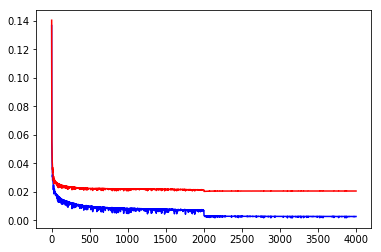

In [11]:
plt.plot(mae_trai_arra[200], 'b', mae_vali_arra, 'r')
plt.show()

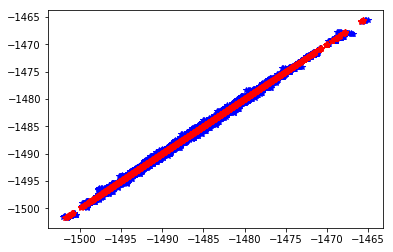

In [13]:
E_train_nn= sess.run(ynn, feed_dict={x:G_train_scaled, y:E_train})

plt.plot(E_train_nn, E_train, '*b', E_train, E_train, '*r')
plt.show()

In [14]:
diff_train= np.abs(np.subtract(E_train_nn, E_train))
print np.max(diff_train)
print np.min(diff_train)
diff_train_aver= np.average(diff_train)
print diff_train_aver

1.42552285937
2.55390625625e-05
0.204786959756


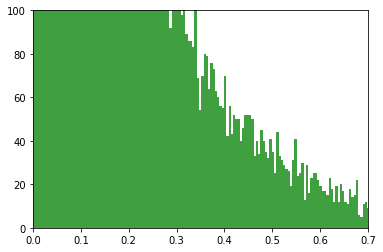

In [15]:
n, bins, patches = plt.hist(diff_train, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 0.7, 0, 100])
plt.show()

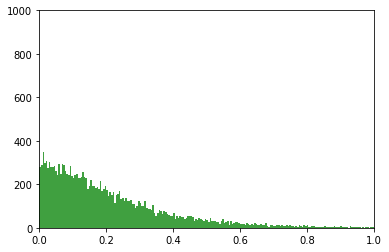

In [16]:
n, bins, patches = plt.hist(diff_train, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 1.0, 0, 1000])
plt.show()

In [17]:
print n[160]
print bins[160]

4.0
0.760290776563


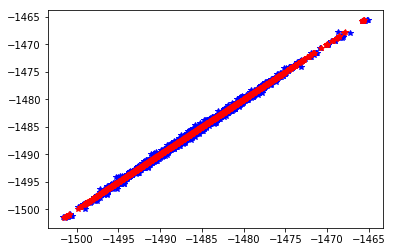

In [18]:
E_vali_nn= sess.run(ynn, feed_dict={x:G_vali_scaled, y:E_vali})

plt.plot(E_vali_nn, E_vali, '*b', E_vali, E_vali, '*r')
plt.show()

1.21361501563
6.8906249453e-06
0.219804994049


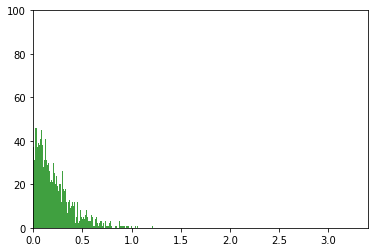

In [19]:
diff_vali= np.abs(np.subtract(E_vali_nn, E_vali))
print np.max(diff_vali)
print np.min(diff_vali)
diff_vali_aver= np.average(diff_vali)
print diff_vali_aver

n, bins, patches = plt.hist(diff_vali, 300, facecolor='g', alpha=0.75)
plt.axis([0.0, 3.4, 0, 100])
plt.show()

In [20]:
np.save('../analysis/diff_vali_nn_l20_k20_q1_X_oni_48', diff_vali)

In [18]:
E_nn= sess.run(ynn, feed_dict={x:G_scaled, y:E})
E_nn_vali=sess.run(ynn, feed_dict={x:G_scaled[struid_vali], y:E})
E_nn_train=sess.run(ynn, feed_dict={x:G_scaled[struid_train], y:E})

np.save('E_nn_vali_C10_t_500_F2_I_gauss_48_2', E_nn_vali)
np.save('E_vali_C10_t_500_F2_I_gauss_48_2', E[struid_vali])
np.save('stru_vali_C10_t_500_F2_I_gauss_48_2', struid_vali)

np.save('E_nn_train_C10_t_500_F2_I_gauss_48_2', E_nn_train)
np.save('E_train_C10_t_500_F2_I_gauss_48_2', E[struid_train])
np.save('stru_train_C10_t_500_F2_I_gauss_48_2', struid_train)

In [14]:
E_nn= sess.run(ynn, feed_dict={x:G_scaled, y:E})
E_nn_vali=sess.run(ynn, feed_dict={x:G_scaled[struid_vali], y:E})
E_nn_train=sess.run(ynn, feed_dict={x:G_scaled[struid_train], y:E})

np.save('E_nn_vali_C10_t_500_F2_I_gauss_48_1', E_nn_vali)
np.save('E_vali_C10_t_500_F2_I_gauss_48_1', E[struid_vali])
np.save('stru_vali_C10_t_500_F2_I_gauss_48_1', struid_vali)

np.save('E_nn_train_C10_t_500_F2_I_gauss_48_1', E_nn_train)
np.save('E_train_C10_t_500_F2_I_gauss_48_1', E[struid_train])
np.save('stru_train_C10_t_500_F2_I_gauss_48_1', struid_train)